# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
# Your code here :
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos para verificar
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [4]:
# Your code here :
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Generar predicciones para los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

# Mostrar el intercepto
print(f"Intercepto: {model.intercept_:.2f}")

# Verificar predicciones (mostrar las primeras 5 de cada conjunto)
print("\nPrimeras 5 predicciones en el conjunto de entrenamiento:")
print(y_train_pred[:5])
print("\nPrimeras 5 predicciones en el conjunto de prueba:")
print(y_test_pred[:5])


Coeficientes del modelo:
CRIM: -0.11
ZN: 0.03
INDUS: 0.04
CHAS: 2.78
NOX: -17.20
RM: 4.44
AGE: -0.01
DIS: -1.45
RAD: 0.26
TAX: -0.01
PTRATIO: -0.92
B: 0.01
LSTAT: -0.51
Intercepto: 30.25

Primeras 5 predicciones en el conjunto de entrenamiento:
[10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]

Primeras 5 predicciones en el conjunto de prueba:
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
# Your code here :
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluar R² en el conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)

# Evaluar MSE en el conjunto de prueba
mse_train = mean_squared_error(y_train, y_train_pred)


## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
# Your code here :
# Evaluar MSE en el conjunto de entrenamiento
r2_test = r2_score(y_test, y_test_pred)

# Evaluar MSE en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [10]:
# Your code here :

# Calcular MAE en el conjunto de prueba
mae_train = mean_absolute_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

# imprimir todo

print("Evaluación del modelo:")
print(f"Conjunto de entrenamiento: R² = {r2_train:.2f}, MSE = {mse_train:.2f}, MAE = {mae_train:.2f}")
print(f"Conjunto de prueba: R² = {r2_test:.2f}, MSE = {mse_test:.2f}, MAE = {mae_test:.2f}")

Evaluación del modelo:
Conjunto de entrenamiento: R² = 0.75, MSE = 21.64, MAE = 3.31
Conjunto de prueba: R² = 0.67, MSE = 24.29, MAE = 3.19


## Classification Model Evaluation

In [11]:
from sklearn.datasets import load_iris
data = load_iris()

In [12]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [13]:
column_names = data.feature_names

In [18]:
df = pd.DataFrame(data['data'],columns=column_names)

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
target = pd.DataFrame(data.target)

In [15]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [28]:
# Your code here :
from sklearn.model_selection import train_test_split

# Definir X (características) y y (variable objetivo)
X = df
y = target

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de prueba: (30, 4)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [29]:
# Your code here :

from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=200)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [ ]:
# Your code here :
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_train_pred: {y_train_pred.shape}")

Forma de y_train: (120,)
Forma de y_train_pred: (404,)


In [47]:
# Asegúrate de que y_train y y_test sean arrays planos
print(type(y_train))
print(type(y_test))
print(y_train.shape)
print(y_test.shape)



<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
(120,)
(30, 1)


In [48]:
y_test = y_test.values.ravel()

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [55]:
# Your code here :
y_train_pred = model.predict(X_train)

# Verificar que las dimensiones coinciden
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_train_pred: {y_train_pred.shape}")


y_test_pred = model.predict(X_test)

# Verificar las dimensiones para asegurarse de que coincidan
print(f"Dimensiones de y_test: {y_test.shape}")
print(f"Dimensiones de y_test_pred: {y_test_pred.shape}")




Dimensiones de y_train: (120,)
Dimensiones de y_train_pred: (120,)
Dimensiones de y_test: (30,)
Dimensiones de y_test_pred: (30,)


In [56]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Mostrar resultados
print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train:.2f}")
print(f"Accuracy en el conjunto de prueba: {accuracy_test:.2f}")

Accuracy en el conjunto de entrenamiento: 0.97
Accuracy en el conjunto de prueba: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [57]:
# Your code here :
from sklearn.metrics import precision_score

# Calcular el precision score para el conjunto de entrenamiento
precision_train = precision_score(y_train, y_train_pred, average='weighted')

# Calcular el precision score para el conjunto de prueba
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Mostrar resultados
print(f"Precision en el conjunto de entrenamiento: {precision_train:.2f}")
print(f"Precision en el conjunto de prueba: {precision_test:.2f}")


Precision en el conjunto de entrenamiento: 0.98
Precision en el conjunto de prueba: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [58]:
# Your code here :
from sklearn.metrics import recall_score

# Calcular el recall score para el conjunto de entrenamiento
recall_train = recall_score(y_train, y_train_pred, average='weighted')

# Calcular el recall score para el conjunto de prueba
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Mostrar resultados
print(f"Recall en el conjunto de entrenamiento: {recall_train:.2f}")
print(f"Recall en el conjunto de prueba: {recall_test:.2f}")

Recall en el conjunto de entrenamiento: 0.97
Recall en el conjunto de prueba: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

In [59]:
# Your code here :
from sklearn.metrics import f1_score

# Calcular el F1-score para el conjunto de entrenamiento
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calcular el F1-score para el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Mostrar resultados
print(f"F1-score en el conjunto de entrenamiento: {f1_train:.2f}")
print(f"F1-score en el conjunto de prueba: {f1_test:.2f}")


F1-score en el conjunto de entrenamiento: 0.97
F1-score en el conjunto de prueba: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

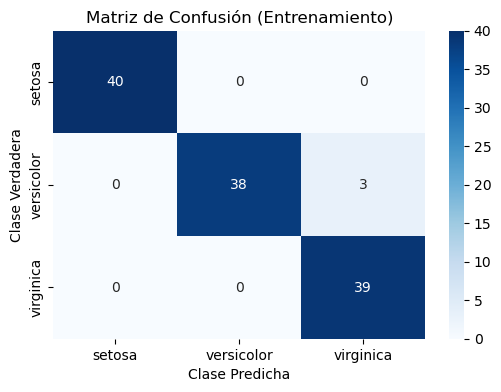

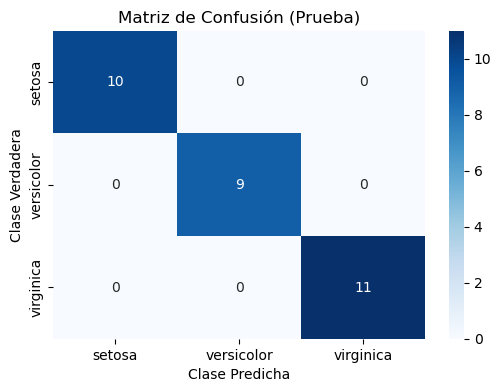

In [60]:
# Your code here :
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generar la matriz de confusión para el conjunto de entrenamiento
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Generar la matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Función para graficar matrices de confusión
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(title)
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()

# Graficar las matrices de confusión
plot_confusion_matrix(conf_matrix_train, "Matriz de Confusión (Entrenamiento)")
plot_confusion_matrix(conf_matrix_test, "Matriz de Confusión (Prueba)")


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [61]:
# Have fun here !

from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Generar predicciones para el conjunto de entrenamiento y prueba
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

# Verificar las dimensiones
print(f"Dimensiones de y_train_pred_tree: {y_train_pred_tree.shape}")
print(f"Dimensiones de y_test_pred_tree: {y_test_pred_tree.shape}")


Dimensiones de y_train_pred_tree: (120,)
Dimensiones de y_test_pred_tree: (30,)


Accuracy (Entrenamiento): 1.00, (Prueba): 1.00
Precision (Entrenamiento): 1.00, (Prueba): 1.00
Recall (Entrenamiento): 1.00, (Prueba): 1.00
F1-score (Entrenamiento): 1.00, (Prueba): 1.00


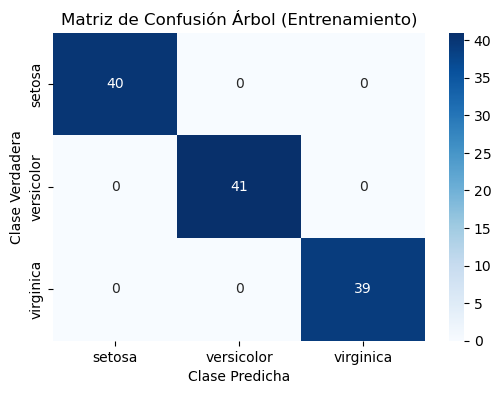

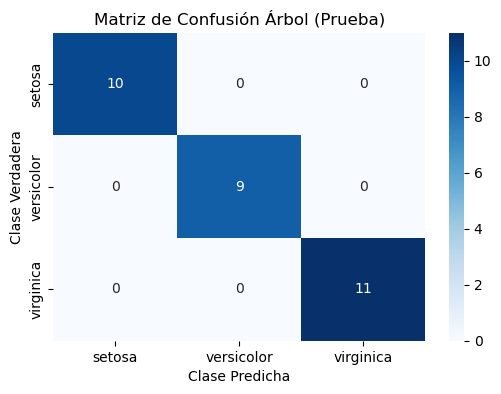

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular métricas para el Árbol de Decisión
accuracy_train_tree = accuracy_score(y_train, y_train_pred_tree)
accuracy_test_tree = accuracy_score(y_test, y_test_pred_tree)

precision_train_tree = precision_score(y_train, y_train_pred_tree, average='weighted')
precision_test_tree = precision_score(y_test, y_test_pred_tree, average='weighted')

recall_train_tree = recall_score(y_train, y_train_pred_tree, average='weighted')
recall_test_tree = recall_score(y_test, y_test_pred_tree, average='weighted')

f1_train_tree = f1_score(y_train, y_train_pred_tree, average='weighted')
f1_test_tree = f1_score(y_test, y_test_pred_tree, average='weighted')

# Mostrar métricas
print(f"Accuracy (Entrenamiento): {accuracy_train_tree:.2f}, (Prueba): {accuracy_test_tree:.2f}")
print(f"Precision (Entrenamiento): {precision_train_tree:.2f}, (Prueba): {precision_test_tree:.2f}")
print(f"Recall (Entrenamiento): {recall_train_tree:.2f}, (Prueba): {recall_test_tree:.2f}")
print(f"F1-score (Entrenamiento): {f1_train_tree:.2f}, (Prueba): {f1_test_tree:.2f}")

# Matrices de Confusión
conf_matrix_train_tree = confusion_matrix(y_train, y_train_pred_tree)
conf_matrix_test_tree = confusion_matrix(y_test, y_test_pred_tree)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(title)
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()

# Graficar las matrices de confusión
plot_confusion_matrix(conf_matrix_train_tree, "Matriz de Confusión Árbol (Entrenamiento)")
plot_confusion_matrix(conf_matrix_test_tree, "Matriz de Confusión Árbol (Prueba)")


In [ ]:
#el modelo estaria 100% acertado